# Vehicle CO2 Emission Analysis and Prediction
### Introduction
The content of this project is similar to my previous job, which requires me to find the relationships between vehicle information (or other environmental parameters) and the gas emissions. In comparison with MS Excel, Python has more powerful tools for big data analysis, especially on Classification, Clustering and other Machine Learning. 
In this project, I have done:
 * From the components of a vehicle, estimate the CO2 Emissions with K-NearestNeighbor(KNN) method, other than detecting the fuel_combustion information (which directly contributes to CO2 Emissions), it would help customers to choose environmental-friendly vehicles quickly.
 * Analysis the relationship between fuel_combustion data and CO2 Emission, build regression model for prediction.

In [66]:
# import libraries
import wget
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1. Prepare the data

In [67]:
# In practice, researchers often collect environmental data by their own, and the data belong to whom applu the fundings (academy or company)
# Here I use an online course source of vehicle CO2 emission data as the example of analysis:
url ='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv'
file = wget.download(url)

100% [..............................................................................] 72629 / 72629

In [68]:
# check the data intergrity and validation (see if it includes errors, or unformated values, etc.)
df = pd.read_csv(file)
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [69]:
# check how many distinct items in each category
# for c in df.columns:
#     print("---- %s ---" % c)
#     print(df[c].value_counts())

## 2. Find the relationship between Vehicle components and CO2 Emissions
A very straightforward way to analysis data is firstly plot the data, 
because the plot figure could immediately exhibit trends and tendacy to analyst, and reward a quick opinion for building a analysis strategy.

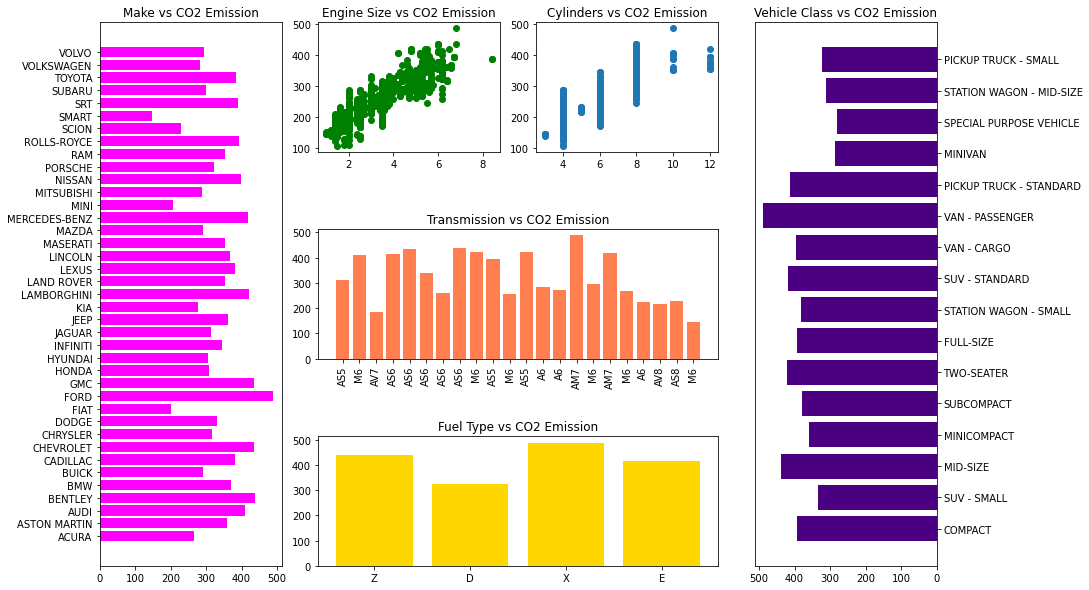

In [76]:
# find the relations between vehicle categorical parameters and CO2 Emission
x1 = df[['MAKE','VEHICLECLASS','ENGINESIZE','CYLINDERS','TRANSMISSION','FUELTYPE']]
y1 = df['CO2EMISSIONS']
# get a plotframe, make sure there are enough space for each plot (determined by the item number in category)
fig = plt.figure(figsize = (15,10))
ax1 = plt.subplot2grid((3,4),(0,0), colspan = 1, rowspan = 3)
ax2 = plt.subplot2grid((3,4),(0,3), colspan = 1, rowspan = 3)
ax3 = plt.subplot2grid((3,4),(0,1))
ax4 = plt.subplot2grid((3,4),(0,2))
ax5 = plt.subplot2grid((3,4),(1,1), colspan = 2, rowspan = 1)
ax6 = plt.subplot2grid((3,4),(2,1), colspan = 2, rowspan = 1)

# Make
ax1.barh(x1.MAKE, y1, height =0.8, color = 'fuchsia')
ax1.set_title('Make vs CO2 Emission',fontsize = 12)

# Vehicle class
ax2.barh(x1.VEHICLECLASS, y1, height =0.8, color = 'indigo')
ax2.set_title('Vehicle Class vs CO2 Emission',fontsize = 12)
ax2.invert_xaxis()
ax2.yaxis.tick_right()

# Engine Size
ax3.scatter(x1.ENGINESIZE,y1, color = 'green')
ax3.set_title('Engine Size vs CO2 Emission')

# Cylinders
ax4.scatter(x1.CYLINDERS,y1)
ax4.set_title('Cylinders vs CO2 Emission')

# Transmission
ax5.bar(x1.TRANSMISSION,y1, color = 'coral')
ax5.set_xticklabels(x1.TRANSMISSION,rotation = 90)
ax5.set_title('Transmission vs CO2 Emission')

# Fuel Type
ax6.bar(x1.FUELTYPE,y1, color = 'gold')
ax6.set_title('Fuel Type vs CO2 Emission')

plt.subplots_adjust(wspace= 0.2, hspace = 0.6)
plt.show()

### A first impression of each attribute
* The EngineSize and Cylinders both seemed to closely relate to CO2 Emission, the higher their values, the more CO2 emissions.
* Cylinders vs. CO2 emission have a trend correlates to the sizes of Cylinder, but it doesn't look like linear relation but more like a classification. The reason why this trends is obviouse may be due to the clear order of Cylinder size.
* It means that the other attributes could have likely trends if their categories in a well-order.
* The Engine Size vs. CO2 emission plot is seemly a linear relation.

In [77]:
# The analysis begin with fitting data of the engine size vs. CO2 emissions with linear regression model and check the accuracy
engine_data = df[['ENGINESIZE','CO2EMISSIONS']]

# The Equation of Linear Regression is as Y = KX + be
# Generally this model emphasizes on finding the K(coefficients) and b(intercept)
from sklearn import linear_model

# First of all, split the big dataset, because Machine learning model should have some data for training (normally 80%) 
# and the rest(20%) for test the model
model = np.random.rand(len(engine_data)) <= 0.8
engine_train = engine_data[model]
engine_test = engine_data[~model]

engine_reg = linear_model.LinearRegression()
engine_train_x = np.asanyarray(engine_train[['ENGINESIZE']])
engine_train_y = np.asanyarray(engine_train[['CO2EMISSIONS']])
engine_reg.fit(engine_train_x, engine_train_y)

# Calculate the coefficients,finding K and b 
print ('Coefficients: ', engine_reg.coef_)
print ('Intercept: ',engine_reg.intercept_)

Coefficients:  [[39.13186267]]
Intercept:  [125.76456535]


In [78]:
# Now use the test set for examing the R2-score (the value which shows how good it fits your training data)
from sklearn.metrics import r2_score

engine_test_x = np.asanyarray(engine_test[['ENGINESIZE']])
engine_test_y = np.asanyarray(engine_test[['CO2EMISSIONS']])
engine_test_y_hat = engine_reg.predict(engine_test_x)

# Mean absolute error(MAE) tells the range of an error that can be expected on average
print("Mean absolute error(MAE): %.2f" % np.mean(np.absolute(engine_test_y_hat - engine_test_y)))

# Mean square error(MSE) corresponding to the expected value of the squared error loss
print("Mean square error(MSE): %.2f" % np.mean((engine_test_y_hat - engine_test_y) ** 2))

# R2 score is the value shows how good it fits the training data, the closer R to 1, the better.
print("R2-score: %.2f" % r2_score(engine_test_y_hat , engine_test_y) )

Mean absolute error(MAE): 22.87
Mean square error(MSE): 913.50
R2-score: 0.70


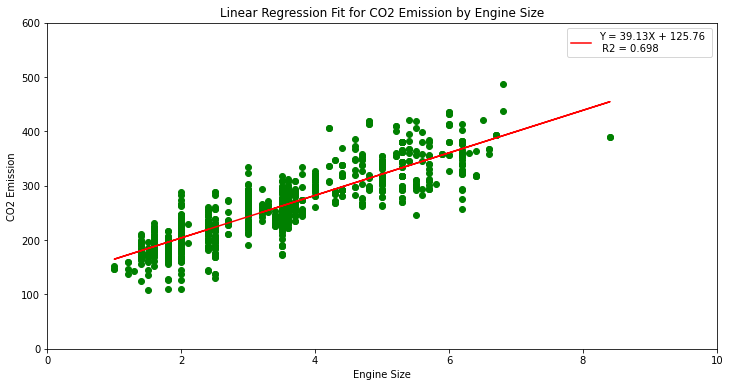

In [79]:
# plot the linear regression line
plt.figure(figsize = (12,6))
plt.scatter(engine_data.ENGINESIZE, engine_data.CO2EMISSIONS, color='Green')
plt.title('Linear Regression Fit for CO2 Emission by Engine Size')
plt.xlim(0,10)
plt.ylim(0,600)
plt.plot(engine_train_x, engine_reg.coef_[0]*engine_train_x + engine_reg.intercept_[0], '-r', 
         label = 'Y = {}X + {} \n R2 = {}'.format(engine_reg.coef_[0][0].round(2),
                                                  engine_reg.intercept_[0].round(2),
                                                  r2_score(engine_test_y_hat , engine_test_y).round(3)))
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emission")
plt.legend(loc = 'best')

###  Linear regression identifies the equation that produces the smallest difference between all of the observed values and their fitted values
* R2 = (Exlained variance by the model/Total Variance), the more its value close to 1, the model is better fitting.
* The linear regression interpret this correlation as CO2 Emission = Engine Size * 39.13 + 125.76
* The K and b could be changed very slightly because we choose the train sets and test sets randomly
* An ideal linear regression model should have a R2 value >= 0.99, however in reality, the outcomes always involved with many factors
* R2 = 0.7 is a considerable linear regression accuracy in practice
* So the engine size may hahve a positive linear relation with CO2 emissions (increase and decrease in the same time.)

## 3. K-NearestNeighbor (K-NN) model for classification

K-NN is a non-parametric (non numeric) method used for classification and regression. K is a constant that defines the length of similar features, so as to classificate features into new categories: 
* In K-NN classification, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.
* In K-NN regression, the output is the property value for the object. This value is the average of the values of k nearest neighbors.

### 3.1 Encode the data
Encoding is the process of converting text or boolean values to numerical values for processing.

In [80]:
# Separate the features and the measurement
# 'MAKE' is the brand of the vehicle, this attribute is very unrelated, it is not needed to include
x1 = df[['VEHICLECLASS','ENGINESIZE','CYLINDERS','TRANSMISSION','FUELTYPE']]
y1 = df[['CO2EMISSIONS']]
# Get data from the dataframe for training and testing
KNN_1 = x1.copy().values

In [81]:
# Import K-NN tool
from sklearn import preprocessing
# Use preprocessing.LabelEncoder() to transform the string values into numeric values
# Set this function to each attribute for the numeric values could invert_transform back to string values
vehicle = preprocessing.LabelEncoder()
vehicle_fit = vehicle.fit(x1['VEHICLECLASS'].unique())
KNN_1[:,0] = vehicle_fit.transform(KNN_1[:,0])

engine = preprocessing.LabelEncoder()
engine_fit = engine.fit(x1['ENGINESIZE'].unique())
KNN_1[:,1] = engine_fit.transform(KNN_1[:,1])

cylinder = preprocessing.LabelEncoder()
cylinder_fit = cylinder.fit(x1['CYLINDERS'].unique())
KNN_1[:,2] = cylinder_fit.transform(KNN_1[:,2])

transmission = preprocessing.LabelEncoder()
transmission_fit = transmission.fit(x1['TRANSMISSION'].unique())
KNN_1[:,3] = transmission_fit.transform(KNN_1[:,3])

fueltype = preprocessing.LabelEncoder()
fuel_fit = fueltype.fit(x1['FUELTYPE'].unique())
KNN_1[:,4] = fuel_fit.transform(KNN_1[:,4])

#### The 'preprocessing' will convert the string values into numeric values,  the values could be call back

In [82]:
def callback():
    callback_table = pd.DataFrame(columns=['VEHICLECLASS','VEHICLECLASS_NUM',
                                           'ENGINESIZE','ENGINESIZE_NUM',
                                           'CYLINDERS','CYLINDERS_NUM',
                                           'TRANSMISSION','TRANSMISSION_NUM',
                                           'FUELTYPE','FUELTYPE_NUM'])
    
    callback_table['VEHICLECLASS'] = vehicle_fit.inverse_transform(KNN_1[:,0].astype(int))
    callback_table['VEHICLECLASS_NUM'] = KNN_1[:,0]
    
    
    callback_table['ENGINESIZE'] = engine_fit.inverse_transform(KNN_1[:,1].astype(int))
    callback_table['ENGINESIZE_NUM'] = KNN_1[:,1]
    
    callback_table['CYLINDERS'] = cylinder_fit.inverse_transform(KNN_1[:,2].astype(int))
    callback_table['CYLINDERS_NUM'] = KNN_1[:,2]
    
    callback_table['TRANSMISSION'] = transmission_fit.inverse_transform(KNN_1[:,3].astype(int))
    callback_table['TRANSMISSION_NUM'] = KNN_1[:,3]
    
    callback_table['FUELTYPE'] = fuel_fit.inverse_transform(KNN_1[:,4].astype(int))
    callback_table['FUELTYPE_NUM'] = KNN_1[:,4]
    
    return callback_table

In [83]:
# Prepare the y values (CO2 Emissions), use .copy() to keep previous preprocessing values for future track back
KNN_x = KNN_1.copy()
KNN_y = np.concatenate(y1.copy().values)

In [84]:
# in practical,CO2 emissions often set into classes(Serious levels) to decrease inaccuracy
# and CO2 emissions are numeric values which have too many numbers to encode with, so I manually encode it with the levels
# here I use bins to ranges of CO2 emissions, the more balanced could increase the accuracy for KNN
df.CO2EMISSIONS.value_counts(bins = 8)

(250.5, 298.0]      299
(203.0, 250.5]      282
(155.5, 203.0]      224
(298.0, 345.5]      127
(345.5, 393.0]       85
(393.0, 440.5]       26
(107.619, 155.5]     23
(440.5, 488.0]        1
Name: CO2EMISSIONS, dtype: int64

In [85]:
# Set a series of thresholds(levels) for CO2 Emission
for i in range(len(KNN_y)):
    if KNN_y[i] <= 203:
        KNN_y[i] = 0
    elif KNN_y[i] > 203 and KNN_y[i] <= 250:
        KNN_y[i] = 1
    elif KNN_y[i] > 250 and KNN_y[i] <= 298:
        KNN_y[i] = 2
    else:
        KNN_y[i] = 3
        
# Now the CO2 Emission are group by:
# Level 0 : 0-203
# Level 1 : 203-250
# Level 2 : 250-298
# Level 3 : >298

In [95]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train,X_test,y_train,y_test = train_test_split(KNN_x,KNN_y,test_size=0.2,random_state = 1)

In [96]:
from sklearn.neighbors import KNeighborsClassifier
# Begin with 4 at first, best k will be determined later.
k = 4
#Train Model and Predict  
KNN_class = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)

y_hat = KNN_class.predict(X_test)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, KNN_class.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_hat))

Train set: (853, 5) (853,)
Test set: (214, 5) (214,)
Train set Accuracy:  0.8241500586166471
Test set Accuracy:  0.7663551401869159


* The Accuracy is not bad, but another K may be better

### 3.2 Finding the best K value
One of most important steps for K-NN model is finding the best K value (best accuracy)

In [97]:
# the best K value is the one returns best accuracy (close to 1), try to find it for the modelling
Ks = 100
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks): 
    KNN_test = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    test_hat=KNN_test.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, test_hat)
    std_acc[n-1]=np.std(test_hat==y_test)/np.sqrt(test_hat.shape[0])

mean_acc[0:20]

array([0.74766355, 0.74766355, 0.78037383, 0.76635514, 0.77570093,
       0.74299065, 0.75700935, 0.73364486, 0.69626168, 0.68691589,
       0.71028037, 0.69626168, 0.69158879, 0.71028037, 0.70560748,
       0.70093458, 0.70560748, 0.71028037, 0.70093458, 0.71495327])

In [98]:
std_acc[0:20]

array([0.02969178, 0.02969178, 0.0283    , 0.02892586, 0.02851373,
       0.02987165, 0.02931828, 0.03021806, 0.03143614, 0.03170118,
       0.03100966, 0.03143614, 0.03157055, 0.03100966, 0.03115574,
       0.03129788, 0.03115574, 0.03100966, 0.03129788, 0.03085958])

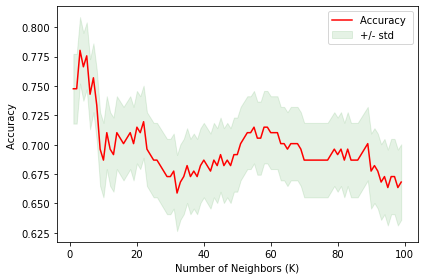

In [99]:
plt.plot(range(1,Ks),mean_acc,'red')
plt.fill_between(range(1,Ks),(mean_acc - 1 * std_acc), (mean_acc + 1 * std_acc),  color = 'green', alpha=0.10)
plt.legend(('Accuracy ', '+/- std'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [100]:
print( "The best accuracy was with", mean_acc.max().round(4), "with k =", mean_acc.argmax()+1) 

The best accuracy was with 0.7804 with k = 3


* The special case where the class is predicted to be the class of the closest training sample (i.e. when k = 1) is called the nearest neighbor algorithm.
* Right here the best k is 3

In [115]:
k = 3
#Train Model and Predict  
KNN_class = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
X_train, X_test, y_train, y_test = train_test_split(KNN_x, KNN_y, test_size=0.2, random_state=2)
y_hat = KNN_class.predict(X_test)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, KNN_class.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_hat))
print("R2-score: %.2f" % r2_score(y_hat , y_test) )

Train set: (853, 5) (853,)
Test set: (214, 5) (214,)
Train set Accuracy:  0.8475967174677609
Test set Accuracy:  0.780373831775701
R2-score: 0.82


### 3.4 Test the model

In [119]:
# find the category's number for each attribute, randomly select the samples
a = callback().sample(n=3)
b = a.index
a

,VEHICLECLASS,VEHICLECLASS_NUM,ENGINESIZE,ENGINESIZE_NUM,CYLINDERS,CYLINDERS_NUM,TRANSMISSION,TRANSMISSION_NUM,FUELTYPE,FUELTYPE_NUM
723,SUBCOMPACT,10,1.8,6,4,1,AS7,12,Z,3
269,SUV - STANDARD,12,3.6,17,6,3,A6,2,X,2
180,SUV - STANDARD,12,6.2,37,8,4,A6,2,E,1


In [120]:
# get the value of CO2 Emission from original table
print(df['CO2EMISSIONS'][b[0]])
print(df['CO2EMISSIONS'][b[1]])
print(df['CO2EMISSIONS'][b[2]])

216
283
322


In [122]:
# put the correlate numbers into prediction function:
# because the samples are randomly selected, each time the values will be different, please check
print('Prediction 1:', KNN_class.predict([[10,6,1,12,3]])) 
print('Prediction 2:', KNN_class.predict([[12,17,3,2,2]]))
print('Prediction 3:', KNN_class.predict([[12,37,4,2,1]]))

Prediction 1: [1]
Prediction 2: [2]
Prediction 3: [3]


#### As categoried above, CO2 Emissions are in levels as:
* Level 0 : 0-203
* Level 1 : 203-250
* Level 2 : 250-298
* Level 3 : >298

Our Predicted values are in correct level, so this model works

### 3.5 Visualization of classification

In [123]:
X_fig = pd.DataFrame(X_test)
X_fig.columns = ['VEHICLECLASS','ENGINESIZE','CYLINDERS','TRANSMISSION','FUELTYPE']

Text(0, 0.5, 'Engine Size')

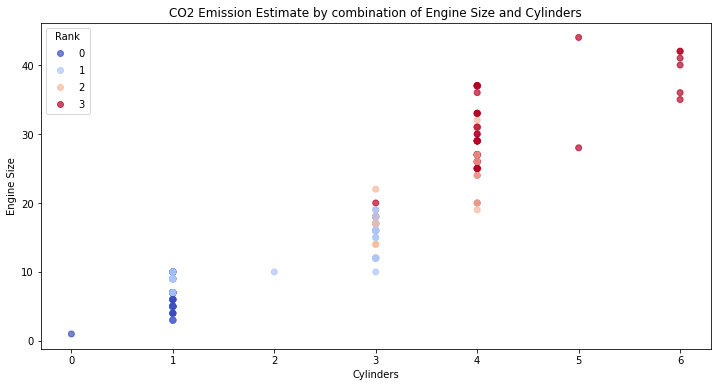

In [126]:
plt.figure(figsize = (12,6))
fig1 = plt.scatter(X_fig['CYLINDERS'],X_fig['ENGINESIZE'], c = y_hat, cmap = 'coolwarm', alpha = 0.7)
lengend1 = plt.legend(*fig1.legend_elements(),title = "Rank",loc='upper left')
title1 = plt.title('CO2 Emission Estimate by combination of Engine Size and Cylinders')
plt.xlabel('Cylinders')
plt.ylabel('Engine Size')

* Even though this simple figure contains only two attributes, it still indicates how will be the CO2 emissions under different combinations of these attributes.
* because the data have been trained and classified, few attributes have more information than before.

Text(0, 0.5, 'Transmission')

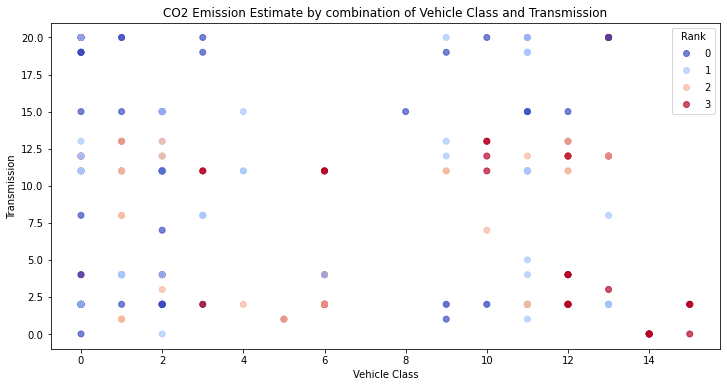

In [127]:
# try another combination
plt.figure(figsize = (12,6))
fig2 = plt.scatter(X_fig['VEHICLECLASS'],X_fig['TRANSMISSION'], c = y_hat, cmap = 'coolwarm',alpha = 0.7)
legend1 = plt.legend(*fig2.legend_elements(),title = "Rank",loc='best')
title1 = plt.title('CO2 Emission Estimate by combination of Vehicle Class and Transmission')
plt.xlabel('Vehicle Class')
plt.ylabel('Transmission')

* Most of the time, even few attributes contain huge differences, and K-NN helps to quickly narrow down the range.

### 3.6 Conclusion
* The K-NN method returns a well classified outcome that reveal a well correlation between 5 attributes of vehicle and CO2 Emissions.
* After K-NN modelling, every data is labeled and classified, the combination of attributes will leave to a certain category of CO2 Emission level. 

## 4. Predict CO2 Emissions with numeric attributes 

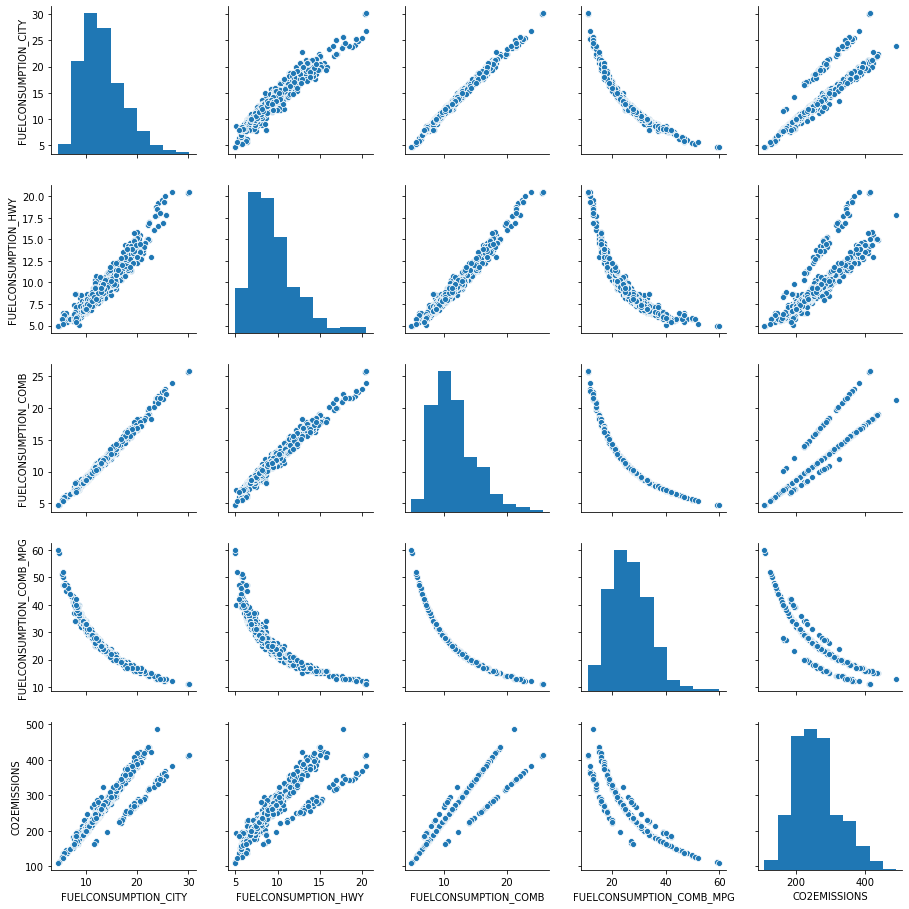

In [128]:
# For the FuelConsumption data (numeric), they are ready to fit into models.
x2 = df[['FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG','CO2EMISSIONS']]
# The seaborn plot could automatically calculate and show nice statistic figures with a bunch of data.
sns.pairplot(x2)

### First Impression
1. The top figure shows the CO2 emission by different features of the vehicles and oils; The feature 'EngineSize' seems to have linear relationship with 'CO2 Emission', while others may not be tightly related to CO2 emission;
2. Some of below figures of Fuel Consumption data reflects both logitic;
3. With understanding of above information, I believe the CO2 emission could be calculated by the features of 'ENGINESIZE','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB' and 'FUELCONSUMPTION_COMB_MPG'.

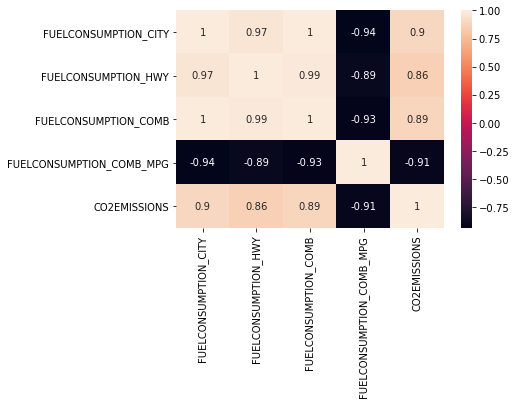

In [129]:
# Use correMatrix to find the relativity of these data
corrMatrix = x2.corr()
sns.heatmap(corrMatrix, annot=True )

#### Explanation of attributes
* City = City
* HWY = Highway
* Comb = Combination of city and hwy 
* MPG = Miles per gallon

### 4.1 Linear Regression
* Those numeric values are seemed to be fitting linear regression models

In [130]:
from sklearn import linear_model
from sklearn.metrics import r2_score

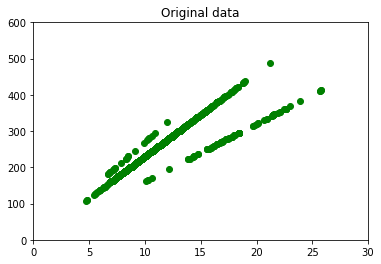

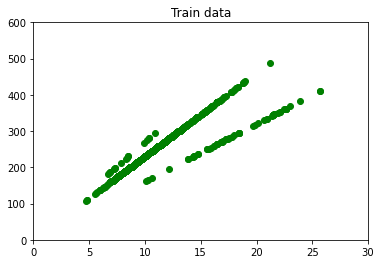

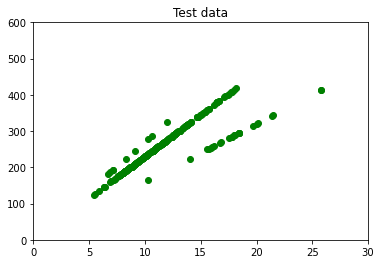

In [131]:
# There are many figures fit to linear regression,
# Here I just pick one of them to do analysis as example:
X_s = df[['FUELCONSUMPTION_COMB']]
y_s = df[['CO2EMISSIONS']]

# The Equation of Linear Regression is as Y = KX + b
# use sklearn to calculate the K(coefficients), b(intercept)

# Separate the dataset into train sets and test sets
X_s_train,X_s_test,y_s_train,y_s_test = train_test_split(X_s,y_s,random_state = 1)

# Begin at making figures for comparison
f1 = plt.figure(1)
plt.scatter(X_s['FUELCONSUMPTION_COMB'],y_s,color = 'Green')
plt.title('Original data')
plt.xlim(0,30)
plt.ylim(0,600)

f2 = plt.figure(2)
plt.scatter(X_s_train,y_s_train,color = 'Green')
plt.title('Train data')
plt.xlim(0,30)
plt.ylim(0,600)

f3 = plt.figure(3)
plt.scatter(X_s_test,y_s_test,color = 'Green')
plt.title('Test data')
plt.xlim(0,30)
plt.ylim(0,600)

plt.show()


In [132]:
# finding K and b 
Fuel_reg = linear_model.LinearRegression()
Fuel_reg.fit(X_s_train, y_s_train)
Fuel_y_hat = Fuel_reg.predict(X_s_test)
# Calculate the coefficients
print ('Coefficients: ', Fuel_reg.coef_)
print ('Intercept: ',Fuel_reg.intercept_)

Coefficients:  [[16.31628365]]
Intercept:  [67.22462507]


Text(0, 0.5, 'CO2 Emission')

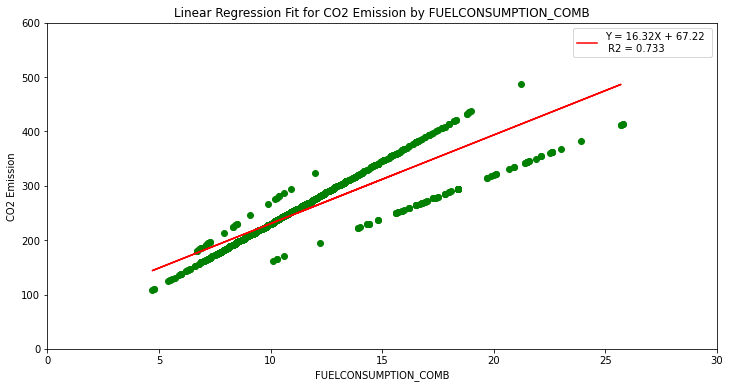

In [135]:
# plot the linear regression line
plt.figure(figsize = (12,6))
plt.scatter(X_s, y_s, color='Green')
plt.title('Linear Regression Fit for CO2 Emission by FUELCONSUMPTION_COMB')

plt.xlim(0,30)
plt.ylim(0,600)
plt.plot(X_s_train, Fuel_reg.coef_[0]*X_s_train + Fuel_reg.intercept_[0], '-r',
        label = 'Y = {}X + {} \n R2 = {}'.format(Fuel_reg.coef_[0][0].round(2),
                                                  Fuel_reg.intercept_[0].round(2),
                                                  r2_score(Fuel_y_hat , y_s_test).round(3)))
plt.legend(loc = 'best')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2 Emission")

* interpret this correlation as CO2 Emission = Fuel Consumption_COMB * 16.32 + 67.22
* with a R2 = 0.733

In [136]:
# Mean absolute error(MAE) tells us how big of an error we can expect from the forecast on average
print("Mean absolute error(MAE): %.2f" % np.mean(np.absolute(Fuel_y_hat - y_s_test)))

# Mean square error(MSE) corresponding to the expected value of the squared error loss
print("Mean square error(MSE): %.2f" % np.mean((Fuel_y_hat - y_s_test) ** 2))

# is the value which shows how good it fits the training data, the closer R to 1, the better.
print("R2-score: %.2f" % r2_score(Fuel_y_hat , y_s_test) )

Mean absolute error(MAE): 21.14
Mean square error(MSE): 876.93
R2-score: 0.73


#### Therefore the relationship between CO2 Emission and Fuel Consumption_COMB is: 
* CO2 Emission = Fuel Consumption_COMB * 16.32 + 67.22
* MAE: 21.14
* MSE: 876.93
* R2-score: 0.73
* note: this single-feature may not be the perfect fit (R2>0.99), however, that's more realitic because the gas emission always influenced by many factors. 
----

## 4.3 Polynomial Regression fit

In [137]:
# The Polynomial Regression is by multiple different K to a upgrade X,
# Its equation is Y = K1X + K2X^2 + K3X^3 + ... + b
from sklearn.preprocessing import PolynomialFeatures
Fuel_poly = PolynomialFeatures(degree=2) # degree means the highest order of X that it may reach to

X_s = df[['FUELCONSUMPTION_COMB_MPG']]
y_s = df[['CO2EMISSIONS']]
X_s_train,X_s_test,y_s_train,y_s_test = train_test_split(X_s,y_s,random_state = 1)

In [138]:
# The method of polynomial regression is based on linear regression, but with polynomial feature fitting with the line
Fuel_reg = linear_model.LinearRegression()
Fuel_reg.fit(X_s_train, y_s_train)

train_x_poly = Fuel_poly.fit_transform(X_s_train)
train_y_poly = Fuel_reg.fit(train_x_poly, y_s_train)

# Calculate the coefficients
print ('Coefficients: ', Fuel_reg.coef_) # the first one goes to zero as standard
print ('Intercept: ',Fuel_reg.intercept_)

Coefficients:  [[  0.         -15.21830658   0.13072439]]
Intercept:  [559.94123417]


In [139]:
test_x_poly = Fuel_poly.fit_transform(X_s_test)
test_y_hat = Fuel_reg.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - y_s_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - y_s_test) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , y_s_test) )

Mean absolute error: 14.86
Residual sum of squares (MSE): 644.95
R2-score: 0.82


Text(0, 0.5, 'CO2 Emission')

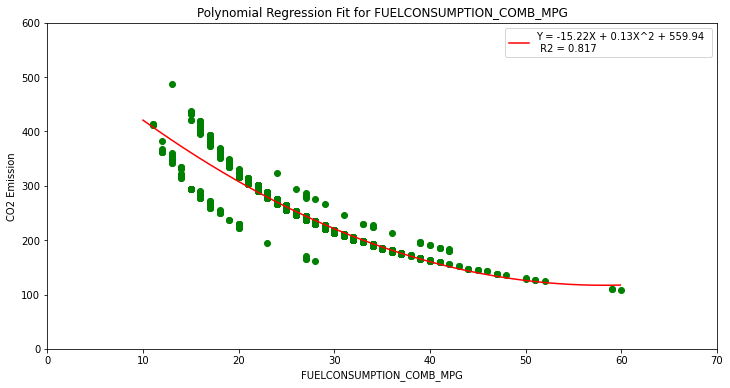

In [140]:
plt.figure(figsize = (12,6))
plt.scatter(X_s, y_s, color='Green')
plt.title('Polynomial Regression Fit for FUELCONSUMPTION_COMB_MPG')
plt.xlim(0,70)
plt.ylim(0,600)
x_range = np.arange(10.0, 60.0, 0.1) # set a range for the regression curve
Y = Fuel_reg.coef_[0][1]*x_range + Fuel_reg.coef_[0][2]*np.power(x_range, 2) + Fuel_reg.intercept_[0]
plt.plot(x_range, Y, '-r',
        label = 'Y = {}X + {}X^2 + {} \n R2 = {}'.format(Fuel_reg.coef_[0][1].round(2),
                                                  Fuel_reg.coef_[0][2].round(2),
                                                  Fuel_reg.intercept_[0].round(2),
                                                  r2_score(test_y_hat , y_s_test).round(3)))
plt.legend(loc = 'best')
plt.xlabel("FUELCONSUMPTION_COMB_MPG")
plt.ylabel("CO2 Emission")

##### The Polynomial Regression fits well with Fuel Consumption comb_MPG vs. CO2 Emissions. 
##### The equation in the figure can be used to predict the CO2 emissions with known MPG values: 
* Y = -15.22X + 0.13X^2 + 559.94
* Y = CO2 Emissions
* X = Fuel Consumption comb_MPG

### Conclusion
* The K-NN method works well with non-numeric attributes, with the normalization (convert to numeric categories), the K-NN method returns accurate prediction.
* And classificate y values into several levels (categories) is very helpful on increase the accuracy for K-NN.
* Linear Regression models are fitting well with numeric values on CO2 emissions prediction. 

## Future Work
1) The linear regression method used here only consider one attribute (Fuel Consumption), however, the combination of other attributes but with same Fuel Consumption will result in different CO2 Emissions.

2) I will try to use other regression methods for better R2 Score, and use more attributes and do normalization for linear regression other than one attribute.

3) And other machine learning methods like random forest or XGBoost is also in consideration, once I figure out better method I will update it to this project.